# Midterm 2 Review Session - Solution

In [1]:
from cs103 import*
from enum import Enum
from typing import  NamedTuple, List
import csv
import matplotlib.pyplot as pyplot
import pdb

#### We are going to be working with sea ice data! :D Partly because I (Pearl) am a weather nerd, and partly because I am dreaming about winter break already

Background Story to this topic (you're going to hear me talk about it anyway):
- Tuktoyaktuk Winter Road (R.I.P)
- Dempster Highway
- Yukon Road Trip (seriously though it's been a long term....)
- Another scary study on climate change "being the worst on record" 
- Sea ice depletion: https://www.sciencedaily.com/releases/2018/09/180927122939.htm


Dataset from Open Data Canada's Datasets. Specifically called:

#### "Sea Ice in Canada – Multi-year sea ice area in Canadian Arctic sub-regions"
https://open.canada.ca/data/en/dataset/f814f199-dfdf-49b5-b8dd-027acc4f47a3

Multi-year sea ice is defined as sea ice that has survived at least one summer's melt. 


Why do we care?

- https://www.ipcc.ch/index.htm
- https://www.sciencedaily.com/releases/2018/09/180927122939.htm

### Step 1a
File: Sub-Region sea Ice Trends

The file contains information about Sub-region sea ice area in Northern Canadian Waters from 1968 to 2015. It includes data for 
- Foxe Basin
- Kane Basin
- Baffin Bay
- Beaufort Sea
- Canadian Arctic Achipelago
- Hudson Bay
- Hudson Strait
- Davis Strait
- North Labrador Sea

###### *All sea ice area is in units thousands of square kilometres*

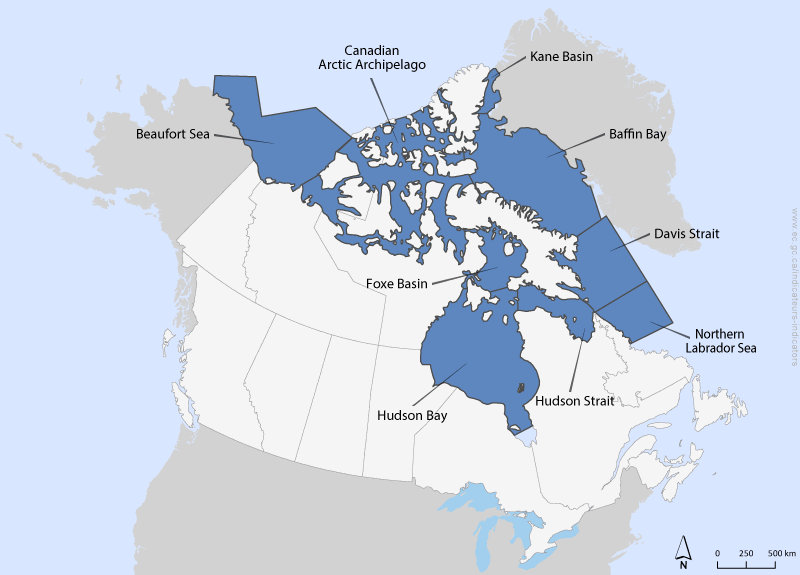

### Step 1b

What a program operating on this information might produce:

1. Region with highest sea ice area in a given year.

2. Region with higest average sea ice.

3. Difference in sea ice for a particular reagion.

4. The year with the highest average sea ice.

5. Change in sea ice area compared to the previous year.

### 6. In our example we will compare 3 regions (Kane Basin,  Beaufort Sea and Canadian Arctic Archipelago) by finding the difference between the average ice area and the yearly ice area for each region, and returning the region with highest depletion for a given input year. 

### Bonus: Time permitting we will also plot the differences against years for the 3 regions 

### Step 1c
Here's an  example that shows the kind of output we expect from this program:
```python
expect(main('Sub-region sea ice trends.csv', 1972),Region.kb)
```


Plot I expect to make is shown below

How did I make this amazing drawing below???
http://asciiflow.com/

### Data Definitons

In [2]:
Ice_Coverage = NamedTuple('Ice_Coverage', [('year', int),# in range [1968,2015]
                                           ('kane_basin', int), #in thousands of square kilometres
                                           ('beaufort_sea', int),
                                          ('can_arctic_arc', int)]) #in thousands of square kilometres

# interp. Ice Coverage data with the year ('year') and sea ice areas for the 3 regions 
#Kane Basin,  Beaufort Sea and Canadian Arctic Archipelago (kane_basin, beaufort_sea, can_arctic_arc)

IC1= Ice_Coverage(1975,34,457,520)
IC2= Ice_Coverage(1976,34,427,597)
IC3= Ice_Coverage(1977,35,286,515)
IC4= Ice_Coverage(1985,30,459,513)
IC5= Ice_Coverage(1986,33,397,622)
IC6= Ice_Coverage(1987,30,275,587)
IC7= Ice_Coverage(2005,30,354,549)
IC8= Ice_Coverage(2006,29,360,436)
IC9= Ice_Coverage(2007,25,242,408)
IC10= Ice_Coverage(2014,25,260,520)
IC11= Ice_Coverage(2015,35,261,418)


#template from Compound (4 fields)
def fn_for_ice_coverage(ic:Ice_Coverage)-> ...:
    return ... (ic.year,
               ic.kane_basin,
               ic.beaufort_sea,
               ic.can_arctic_arc)

#============================================================================================
Region = Enum('Region', ['kb','bs', 'caa'])

#interp. the region as one of: Kane Basin(kb), Beaufort Sea(bs), Canadian Arctic Achipelago(caa)
#examples are redundant for enumerations
#template based on one of (3 cases) and atomic distinct (3 times)
def fn_for_region (r:Region)->...:
    if r == Region.kb:
        return...
    elif r == Region.bs:
        return...
    elif r == Region.caa:
        return...
    
#============================================================================================
RegionalTrend= NamedTuple('RegionalTrend',[('region',Region),
                                           ('year',int),# in range [1968,2015]
                                          ('ice_area',int)])#in thousands of square kilometres
#interp. the data as a ice area ('ice_area') in a given region ('region') in the year ('year')

RT3KB=RegionalTrend(Region.kb,1977,35)
RT3BS=RegionalTrend(Region.bs,1977,286)
RT3CAA=RegionalTrend(Region.caa,1977,515)

RT8KB=RegionalTrend(Region.kb,2006,29)
RT8BS=RegionalTrend(Region.bs,2006,360)
RT8CAA=RegionalTrend(Region.caa,2006,436)

RT10KB=RegionalTrend(Region.kb,2014,25)
RT10BS=RegionalTrend(Region.bs,2014,260)
RT10CAA=RegionalTrend(Region.caa,2014,520)

#template from Compound (3 fields) and reference rule
def fn_for_regional_trend(rt:RegionalTrend)-> ...:
    return ... (fn_for_region(rt.region),
                rt.year,
               rt.ice_area)

#============================================================================================

DifferenceData = NamedTuple('DifferenceData',[('region',Region),
                                              ('year',int),# in range [1968,2015]
                                              ('difference',int)]) #in thousands of square kilometres
#interp. the data for each region ('region') as the difference ('difference') from the average ice area 
#of that region in the year ('year')

D3KB=DifferenceData(Region.kb,1977,35-29.67)
D3BS=DifferenceData(Region.bs,1977,286-302.00)
D3CAA=DifferenceData(Region.caa,1977,515-490.33)

D8KB=DifferenceData(Region.kb,2006,29-29.67)
D8BS=DifferenceData(Region.bs,2006,360-302.00)
D8CAA=DifferenceData(Region.caa,2006,436-490.33)

D10KB=DifferenceData(Region.kb,2014,25-29.67)
D10BS=DifferenceData(Region.bs,2014,260-302.00)
D10CAA=DifferenceData(Region.caa,2014,520-490.33)

#template from Compound (3 fields) and reference rule
def fn_for_difference_data(dd:DifferenceData)-> ...:
    return ... (fn_for_region(dd.region),
                dd.year,
               dd.difference)


#===================================================================================================================

# List[Ice_Coverage]
# interp. a list of information about sea ice coverage

LOIC0=[] #test file 3
LOIC1=[IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11] #test file 1
LOIC2=[IC3,IC8,IC10] #test file 2


# Template based on arbitrary-sized and the reference rule
def fn_for_loic(loic: List[Ice_Coverage]) -> ...:
    # description of the acc
    acc = ...    # type: ...
    for ic in loic:
        acc = ...(fn_for_ice_coverage(ic), acc)
    return ...(acc)



#===================================================================================================================


# List[RegionalTrend]
# interp. a list of information about regional trends in sea ice coverage

LORT0= []  #from test file 3
LORT2 = [RT3KB,RT3BS,RT3CAA,RT8KB,RT8BS,RT8CAA,RT10KB,RT10BS,RT10CAA]  #from test file 2

# Template based on arbitrary-sized and the reference rule
def fn_for_lort(lort: List[RegionalTrend]) -> ...:
    # description of the acc
    acc = ...    # type: ...
    for rt in lort:
        acc = ...(fn_for_regional_trend(rt), acc)
    return ...(acc)

#===================================================================================================================

# List[DifferenceData]
# interp. a list of information about the difference data in sea ice

LODD0=[]
LODD2=[D3KB,D3BS,D3CAA,D8KB,D8BS,D8CAA,D10KB,D10BS,D10CAA]

# Template based on arbitrary-sized and the reference rule
def fn_for_lodd(lodd: List[DifferenceData]) -> ...:
    # description of the acc
    acc = ...    # type: ...
    for d in lodd:
        acc = ...(fn_for_difference_data(d), acc)
    return ...(acc)

### 2b and 2c -> design read and the rest of the program

In [3]:
@typecheck
def main(fn: str, y:int) -> Optional[Region]:
    """
    Reads the file from given fn and returns the Region with highest sea ice depletion from average, in the year y
    returns None if data is empty or if no data from the given year exists in the file

    """
    #return None #stub
    # template from HtDAP, based on function composition
    return analyze(read(fn),y)    

@typecheck
def analyze(loic:List[Ice_Coverage], year:int)->Optional[Region]:
    """
     compares 3 regions from loic (Kane Basin,  Beaufort Sea and Canadian Arctic Archipelago) 
     and returning the region with highest sea ice area depletion from average for the given input year.
     
     returns None if list is empty or if no data from the given year exists in loic
    """
    
    #return None #stub
    
    #template based on function composition
    return highest_depletion(filter_year(create_list_difference_data(split_by_region_trend(loic)),year))
    
    
@typecheck
def read(fn: str) -> List[Ice_Coverage]:
    """    
    Reads the file from given filename(fn) and returns a list of the
    Ice_Coverage
    """
    #return []   #stub
    #template from HtDAP
    
    # loic contains the result so far
    loic = []   # type: List[Ice_Coverage]
    with open(fn, encoding = "ISO-8859-1") as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        
        next(reader) # skip first 3 lines
        next(reader)
        next(reader)
        
        for row in reader:
            if is_valid(row[0]) and is_valid(row[2]) and is_valid(row[4]) and is_valid(row[5]):
                year = parse_int(row[0])
                k_basin = parse_int(row[2])
                b_sea= parse_int(row[4])
                c_arc= parse_int(row[5])
                ic = Ice_Coverage(year,k_basin,b_sea, c_arc)  
                loic.append(ic)
    return loic


        
@typecheck
def is_valid(s1: str) -> bool:
    """
    return True if none of the above given strings are empty, False otherwise
    """
    # return False # body of the stub
    # return ... (s1,s2,s3) template based on atomic non-distinct
    
    return s1.strip() != ""



@typecheck
def split_by_region_trend(loic:List[Ice_Coverage])->List[RegionalTrend]:
    """
    Splits the List[Ice_Coverage] data into regions to create List[RegionalTrend] 
    """
    #return []  #stub
    #template from List[Ice_Coverage]
    
    acc =[]
    for ic in loic:
        acc = acc + make_regional_trends(ic)
    return acc


@typecheck
def make_regional_trends(ic:Ice_Coverage)->List[RegionalTrend]:
    """
    Splits the Ice_Coverage data into regions to create List[RegionalTrend] 
    """
    #return []  #stub
    #template from Ice_Coverage
    regions = []
    regions.append(RegionalTrend(Region.kb,ic.year,ic.kane_basin))
    regions.append(RegionalTrend(Region.bs,ic.year,ic.beaufort_sea))
    regions.append(RegionalTrend(Region.caa,ic.year,ic.can_arctic_arc))
    return regions



@typecheck
def filter_year(lodd:List[DifferenceData],year:int)->List[DifferenceData]:
    """
    takes lort and returns a list RegionalTrend only from the year 'year'
    """
    #return []  #stub
    #template from List[DifferenceData] with an additional int parameter
    
    filtered_data=[]
    for dd in lodd:
        if same_year(dd,year):
            filtered_data.append(dd)
    return filtered_data


@typecheck
def same_year(dd:DifferenceData, year:int)->bool:
    """
    return true if d is data from the same year as 'year'
    """
    
    #return True  #stub
    #template from DifferenceData with an additional int parameter
    
    return dd.year == year




@typecheck
def create_list_difference_data(lort:List[RegionalTrend])->List[DifferenceData]:
    """
    find difference from average for a given region and 
    create a list of DifferenceData from the given List[RegionalTrend] 
    
    NOTE: negative difference is depletion in sea ice

    """
    #return []  #stub
    #template from List[RegionalTrend]
    
    
    acc=[]
    
    for rt in lort:
        acc.append(make_difference_data(rt,average_per_region(lort,rt)))
    return acc 


@typecheck 
def make_difference_data(rt:RegionalTrend, avg:float)->DifferenceData:
    """
    find difference in ice area from average for rt and create a DifferenceData for this rt
    
    NOTE: negative difference is depletion in sea ice
    """
    
    #return D3KB #stub
    #template from RegionalTrend with an additional float paramet

    return DifferenceData(rt.region,
                          rt.year,
                          rt.ice_area-avg)

    

@typecheck
def highest_depletion(lodd:List[DifferenceData]) -> Optional[Region]:
    """
    returns the region with the highest depletion (most negative difference) from lort 
    **returns None if lodd is empty
    """
    #template from List[DifferenceData] 
    
    if len(lodd)==0:
        return None
    
    highest=lodd[0]
    
    for dd in lodd:
        if higher_depletion(dd,highest):
            highest = dd
            
    return highest.region



@typecheck
def average_per_region(lort:List[RegionalTrend], rt:RegionalTrend)->float:
    """
    given a list of Regional Trends, filters trends for only rt's region 
    and returns the average ice coverage for that given region
    """
    #return 0 #float
    #template from function composition
    
    return find_average_of_region(region_only(lort,rt))


@typecheck
def find_average_of_region(lort: List[RegionalTrend])->float:
    """
    returns the average ice area of the lort
    """
    #return 0 #float
    #template from List[RegionalTrend]
    
    if len(lort)==0:
        return 0
    
    total=0
    for rt in lort:
        total = total + rt.ice_area
    
    return round(total/len(lort),2)


    

@typecheck
def region_only(lort:List[RegionalTrend], rt2:RegionalTrend)->List[RegionalTrend]:
    """
    given a list of Regional Trends, filters trends for rt2's region only
    """
    #return [] #float
    #template from List[RegionalTrend] with an additional RegionalTrend parameter
    
        
    region_r_only=[]
    for rt in lort:
        if regional_trend_matches(rt, rt2):
            region_r_only.append(rt)
    return region_r_only


 
    
@typecheck
def regional_trend_matches(rt1:RegionalTrend, rt2:RegionalTrend)->bool:
    """
    returns True if regions match for rt1 and rt2
    """
    #return False #stub
    #template from RegionalTrend
    return regions_match(rt1.region, rt2.region)



@typecheck
def regions_match(r1:Region, r2:Region)->bool:
    """
    returns True if regions match for r1 and r2
    """
    #return False #stub
    #template from Region
    if r1 == Region.kb:
        return r2 == Region.kb
    elif r1 == Region.bs:
        return r2 == Region.bs
    elif r1 == Region.caa:
        return r2 == Region.caa
    



@typecheck
def higher_depletion(dd1:DifferenceData,dd2:DifferenceData)-> bool:
    """
    true if rt1 has more depletion than rt2 (that is rt1's difference is more negative than rt2)
    """
    
    #return False  #stub
    #template from DifferenceData
    
    return dd1.difference< dd2.difference

    





## Chart showing all the helpers

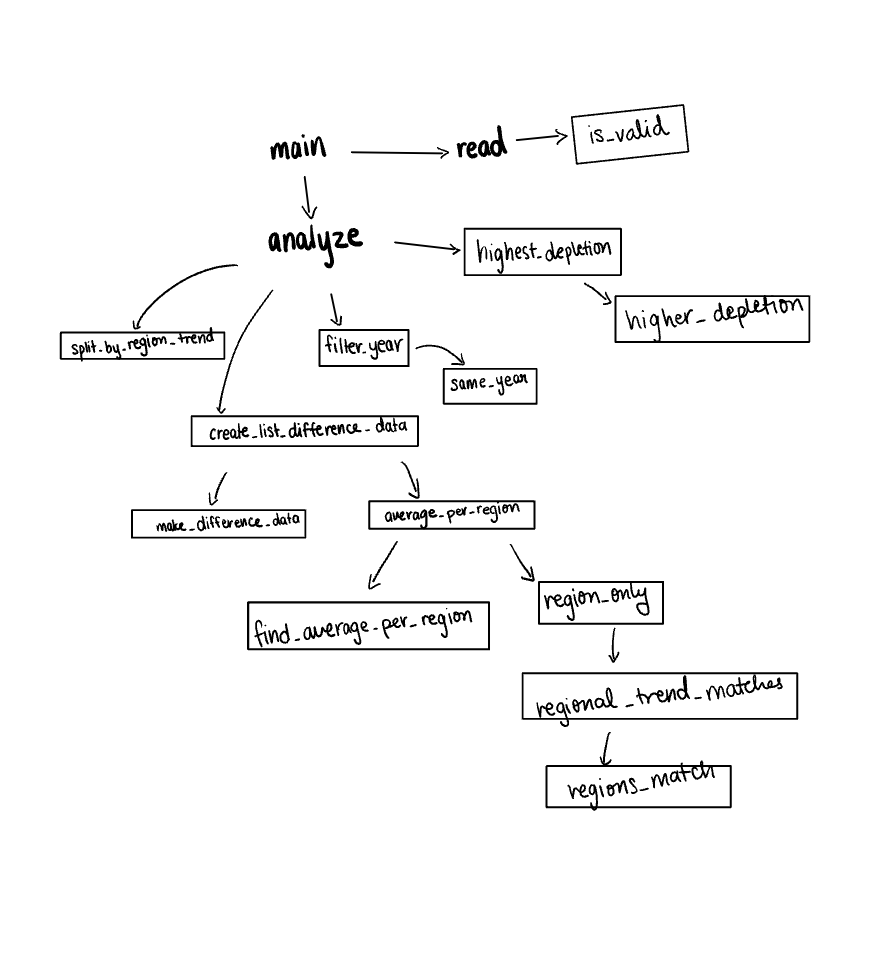

### Tests for main

In [4]:

start_testing()
#tests for main
expect(main('Subregion_sea_ice_area_trends.csv',2015),Region.caa)
expect(main('Subregion_sea_ice_area_trends_test1.csv',2014),Region.bs)
expect(main('Subregion_sea_ice_area_trends_bonus_test.csv',1978),Region.kb)
expect(main('Subregion_sea_ice_area_trends_test3.csv',2015),None)

#tests for analyze
expect(analyze(LOIC1,1987),Region.bs)
expect(analyze(LOIC1,2005),Region.kb)
expect(analyze(LOIC2,1977),Region.bs)
expect(analyze(LOIC0,1968),None)
expect(analyze(LOIC1,1968),None)

#tests for read
expect(len(read('Subregion_sea_ice_area_trends.csv')),48)
expect(read('Subregion_sea_ice_area_trends_test1.csv'),LOIC1)
expect(read('Subregion_sea_ice_area_trends_test2.csv'),LOIC2)
expect(read('Subregion_sea_ice_area_trends_test3.csv'),LOIC0)


#tests for is_valid
expect(is_valid("hello"), True)
expect(is_valid("     "), False)

#tests for split_by_region_trend
expect(len(split_by_region_trend(read('Subregion_sea_ice_area_trends_test1.csv'))),33)
expect(split_by_region_trend(LOIC2),LORT2)
expect(split_by_region_trend(LOIC0),LORT0)


#tests for make_regional_trends
expect(make_regional_trends(IC3),[RT3KB,RT3BS,RT3CAA])
expect(make_regional_trends(IC8),[RT8KB,RT8BS,RT8CAA])
expect(make_regional_trends(IC10),[RT10KB,RT10BS,RT10CAA])

#tests for filter_year
expect(filter_year(LODD2,2014),[D10KB,D10BS,D10CAA])
expect(filter_year(LODD0,2014),[])
expect(filter_year(LODD2,2006),[D8KB,D8BS,D8CAA])
expect(filter_year(LODD2,1977),[D3KB,D3BS,D3CAA])

#tests for same_year
expect(same_year(D3KB,1977),True)
expect(same_year(D3KB,2014),False)

#tests for create_list_differences
expect(len(create_list_difference_data(split_by_region_trend(read('Subregion_sea_ice_area_trends_test1.csv')))),33)
expect(create_list_difference_data(LORT2),LODD2)
expect(create_list_difference_data(LORT0),LODD0)

#tests for make_difference_data
expect(make_difference_data(RT3KB,29.67),D3KB)
expect(make_difference_data(RT10BS,302),D10BS)

#tests for highest_depletion
expect(highest_depletion(LODD0),None)
expect(highest_depletion(LODD2),Region.caa)
expect(highest_depletion(create_list_difference_data(split_by_region_trend(read('Subregion_sea_ice_area_trends.csv')))),Region.bs)


#tests for average_per_region
expect(average_per_region(LORT2,RT3KB),29.67)
expect(average_per_region(LORT2,RT3BS),302.00)
expect(average_per_region(LORT2,RT3CAA),490.33)
expect(average_per_region(LORT0,RT3CAA),0)


#tests for find_average_of_region
expect(find_average_of_region(LORT2),274)
expect(find_average_of_region(LORT0),0)

#tests for region_only
expect(region_only(LORT2,RT3KB),[RT3KB,RT8KB,RT10KB])
expect(region_only(LORT2,RT3BS),[RT3BS,RT8BS,RT10BS])
expect(region_only(LORT0,RT3BS),[])

#tests for regional_trend_matches
expect(regional_trend_matches(RT3KB,RT8KB),True)
expect(regional_trend_matches(RT3KB,RT8BS),False)


#tests for regions_match
expect(regions_match(Region.kb,Region.kb),True)
expect(regions_match(Region.bs,Region.kb),False)
expect(regions_match(Region.caa,Region.kb),False)
expect(regions_match(Region.kb,Region.bs),False)
expect(regions_match(Region.bs,Region.bs),True)
expect(regions_match(Region.caa,Region.bs),False)
expect(regions_match(Region.kb,Region.caa),False)
expect(regions_match(Region.bs,Region.caa),False)
expect(regions_match(Region.caa,Region.caa),True)


#tests for higher_depletion
expect(higher_depletion(D3KB,D3BS),False)
expect(higher_depletion(D3BS,D3KB),True)


summary()

57 of 57 tests passed


### Plot your data

In [5]:

def get_years(loic:List[Ice_Coverage])-> List[int]:
    """
    return list of years
    """
    acc=[]
    for ic in loic:
        acc.append(ic.year)
    return acc

def get_differences_per_region(lod:List[DifferenceData],r:Region)->List[float]:
    """
    list of differences for a given region
    """
    
    acc = []
    
    
    for d in lod:
            if regions_match(d.region,r):
                acc.append(d.difference)
    return acc
            

    
    
def plot_data(loic: List[Ice_Coverage]) -> None:
    """
    Plots the difference in sea ice area from the given average for each region against time
    """
    #return None   #stub
    # Template based on visualization
    
    
    
    
    x_vals = get_years(loic)
    y_vals_kb = get_differences_per_region(create_list_difference_data(split_by_region_trend(loic)),Region.kb)
    y_vals_bs= get_differences_per_region(create_list_difference_data(split_by_region_trend(loic)),Region.bs)
    y_vals_caa= get_differences_per_region(create_list_difference_data(split_by_region_trend(loic)),Region.caa)
    
    pyplot.plot(x_vals, y_vals_kb,'r', label = 'Kane Basin')
    pyplot.plot(x_vals, y_vals_bs,'b', label = 'Beaufort Sea')
    pyplot.plot(x_vals, y_vals_caa,'g', label = 'Canadian Arctic Archipelago')
    
    pyplot.xlabel("Year")
    pyplot.ylabel("Difference in Ice Area (thousands of sq.km)")
    
    pyplot.legend()
    pyplot.grid(b = True, which='both',axis='both')
    
    

        
    # we always want to finish by showing the plot and returning None
    pyplot.show()
    return None

### Tests for plot

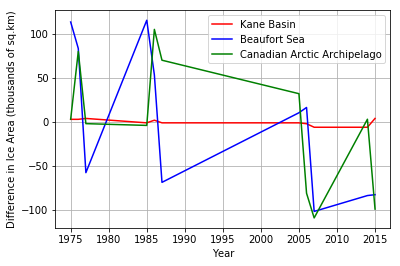

6 of 6 tests passed


In [6]:
start_testing()
#tests for get_years
expect(get_years(LOIC1),[1975, 1976, 1977, 1985, 1986, 1987, 2005, 2006, 2007, 2014, 2015])
expect(get_years(LOIC2),[1977,2006,2014])
expect(get_years(LOIC0),[])

#tests for get_differences_per_region
expect(get_differences_per_region(LODD2,Region.bs),[-16,58,-42])
expect(get_differences_per_region(LODD0,Region.bs),[])

#tests for plot_data
expect(plot_data(LOIC1),None)


summary()

## Map of Dempster Highway

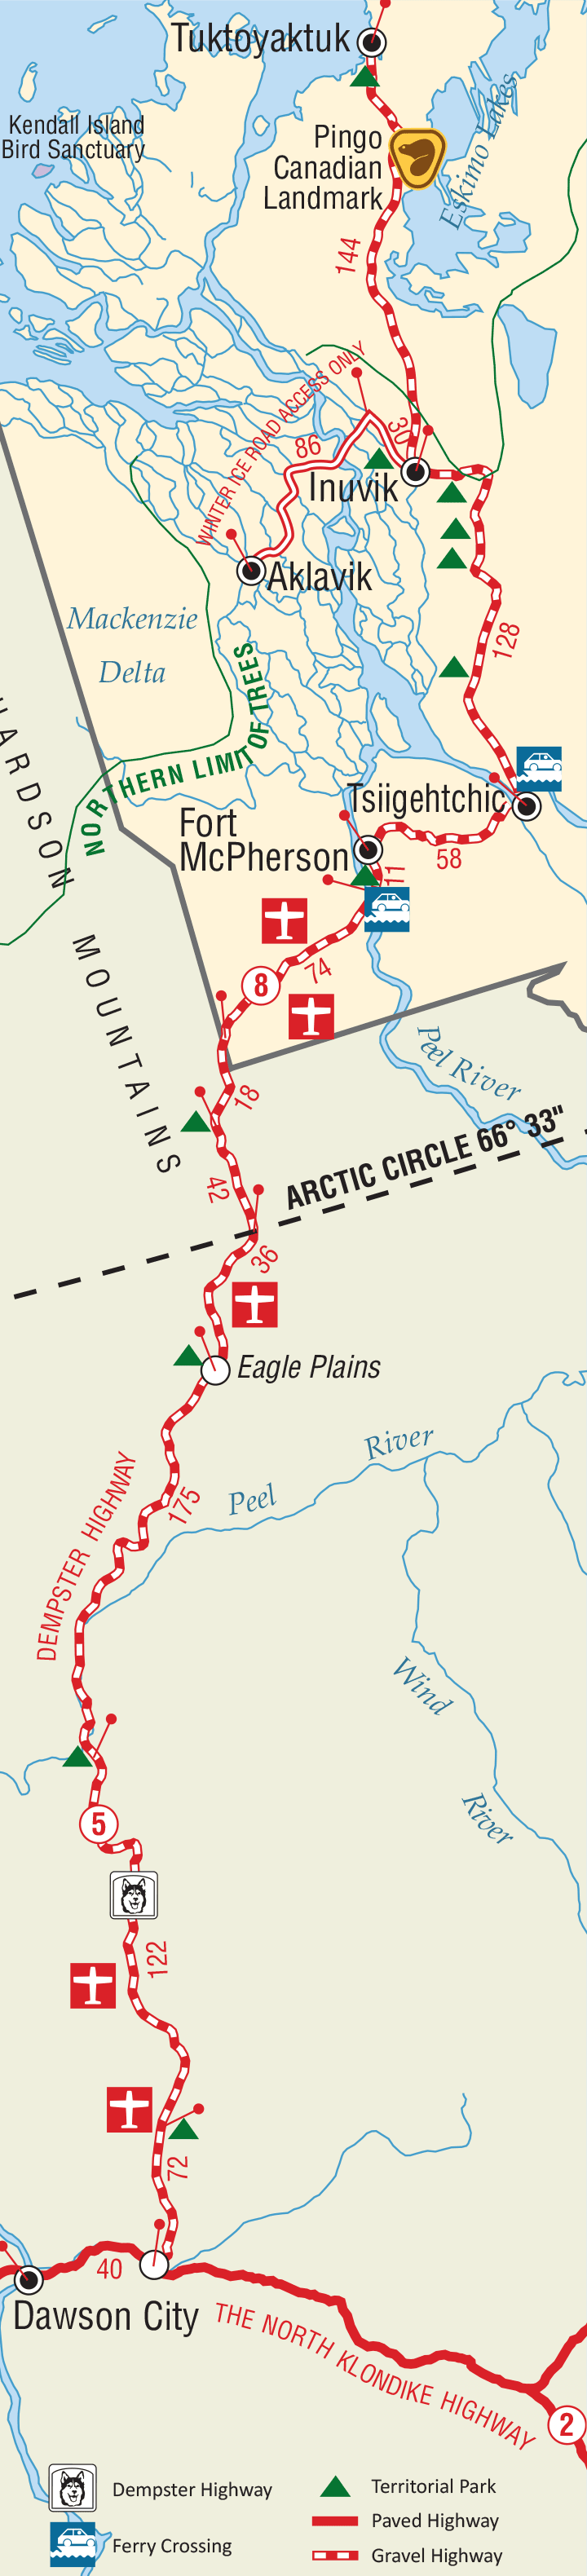

#### TESTING OUR MAIN FILE + SOME COOL OBSERVATIONS

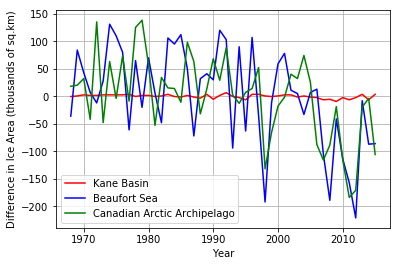

In [7]:
#read our data
full_data= read('Subregion_sea_ice_area_trends.csv')

#plot our data
plot_data(full_data)

## Totally Optional- you can stop reading here :)

From the graph above it makes sense why they would want to discontinue the ice road through Dempster Highway (look at Beaufort Sea)

But interestingly enough, if we look at the region that has seen most depletion *most number of times* Kane Basin tops. 

Hard to believe? Just as a quick excercise I created a function below to print all the years in which each region saw lowest sea ice. 

In [8]:
def find_all_years(loic:List[Ice_Coverage],r:Region)-> List[int]:
    """
    returns all the years where region r has the most depletion
    """
    years_with_r_highest=[]
    years=get_years(full_data)
    for y in years:
        if analyze(loic,y) == r:
            years_with_r_highest.append(y)
    return years_with_r_highest
        
kb_list= find_all_years(full_data,Region.kb)
bs_list = find_all_years(full_data,Region.bs)
caa_list= find_all_years(full_data,Region.caa)

len_kb=len(find_all_years(full_data,Region.kb))
len_bs=len(find_all_years(full_data,Region.bs))
len_caa=len(find_all_years(full_data,Region.caa))


print ('Kane Basin List = {} and it is {} long'.format(kb_list,len_kb) + 
       '\n' + 'Beaufort Sea List = {} and it is {} long'.format(bs_list,len_bs) + 
       '\n' 'Canadian Arctic Archipelago List = {} and it is {} long'.format(caa_list,len_caa))

Kane Basin List = [1969, 1970, 1974, 1976, 1978, 1980, 1983, 1984, 1986, 1989, 1990, 1991, 1992, 1996, 2002, 2003, 2005] and it is 17 long
Beaufort Sea List = [1968, 1972, 1977, 1979, 1982, 1987, 1993, 1995, 1997, 1998, 2004, 2008, 2009, 2012, 2014] and it is 15 long
Canadian Arctic Archipelago List = [1971, 1973, 1975, 1981, 1985, 1988, 1994, 1999, 2000, 2001, 2006, 2007, 2010, 2011, 2013, 2015] and it is 16 long
